In [1]:
!pip install tiingo
!pip install --upgrade ta

In [2]:
# from config import API_KEY
API_KEY = 'e572e848ea6815b9a406e29401951beadd20c949'
import pandas as pd,plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "svg"
# import sweetviz as sv
import plotly.express as px


Obtaining Data

In [3]:
# Data Collection

from tiingo import TiingoClient
from datetime import datetime, timedelta

config = {
    'api_key': API_KEY,
    'session': True  # Use requests.Session
}
client = TiingoClient(config)

# Calculate the start date as today's date minus 2 years
end_date = datetime.now()
start_date = end_date - timedelta(days=20*365)

# Convert dates to string format
start_date_str = start_date.strftime('%Y-%m-%d')
end_date_str = end_date.strftime('%Y-%m-%d')

df = client.get_dataframe('MSFT', frequency='daily',startDate=start_date_str, endDate=end_date_str)

df.head()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2004-02-27 00:00:00+00:00,26.53,26.62,26.35,26.48,58266500,16.595872,16.652171,16.483272,16.564594,58266500,0.0,1.0
2004-03-01 00:00:00+00:00,26.70,26.72,26.50,26.65,51912300,16.702215,16.714726,16.577105,16.670938,51912300,0.0,1.0
2004-03-02 00:00:00+00:00,26.39,26.69,26.35,26.63,66331000,16.508294,16.695960,16.483272,16.658427,66331000,0.0,1.0
2004-03-03 00:00:00+00:00,26.37,26.55,26.22,26.35,54998700,16.495783,16.608383,16.401951,16.483272,54998700,0.0,1.0
2004-03-04 00:00:00+00:00,26.37,26.42,26.21,26.37,44023200,16.495783,16.527061,16.395695,16.495783,44023200,0.0,1.0


In [4]:
df.reset_index(inplace=True)
df.rename(columns={'index': 'new_index'}, inplace=True)  # Rename the old index column
df['date'] = df['date'].dt.date  # Extract the date part from the datetime index
df

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2004-02-27,26.53,26.62,26.35,26.48,58266500,16.595872,16.652171,16.483272,16.564594,58266500,0.00,1.0
1,2004-03-01,26.70,26.72,26.50,26.65,51912300,16.702215,16.714726,16.577105,16.670938,51912300,0.00,1.0
2,2004-03-02,26.39,26.69,26.35,26.63,66331000,16.508294,16.695960,16.483272,16.658427,66331000,0.00,1.0
3,2004-03-03,26.37,26.55,26.22,26.35,54998700,16.495783,16.608383,16.401951,16.483272,54998700,0.00,1.0
4,2004-03-04,26.37,26.42,26.21,26.37,44023200,16.495783,16.527061,16.395695,16.495783,44023200,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5025,2024-02-14,409.49,409.84,404.57,408.07,20401190,409.490000,409.840000,404.570000,408.070000,20401190,0.75,1.0
5026,2024-02-15,406.56,409.13,404.29,408.14,21825525,406.560000,409.130000,404.290000,408.140000,21825525,0.00,1.0
5027,2024-02-16,404.06,408.29,403.44,407.96,22296495,404.060000,408.290000,403.440000,407.960000,22296495,0.00,1.0
5028,2024-02-20,402.79,404.49,398.01,403.24,24307915,402.790000,404.490000,398.010000,403.240000,24307915,0.00,1.0


Exploratory Analysis

In [5]:
import pandas as pd
import ta
from ta.utils import dropna
from ta.volatility import BollingerBands

In [6]:
# # https://github.com/bukosabino/ta?tab=readme-ov-file
# indicator_bb = BollingerBands(close=df["adjClose"], window=20, window_dev=2)
# df['bb_bbm'] = indicator_bb.bollinger_mavg()
# df['bb_bbh'] = indicator_bb.bollinger_hband()
# df['bb_bbl'] = indicator_bb.bollinger_lband()



df

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2004-02-27,26.53,26.62,26.35,26.48,58266500,16.595872,16.652171,16.483272,16.564594,58266500,0.00,1.0
1,2004-03-01,26.70,26.72,26.50,26.65,51912300,16.702215,16.714726,16.577105,16.670938,51912300,0.00,1.0
2,2004-03-02,26.39,26.69,26.35,26.63,66331000,16.508294,16.695960,16.483272,16.658427,66331000,0.00,1.0
3,2004-03-03,26.37,26.55,26.22,26.35,54998700,16.495783,16.608383,16.401951,16.483272,54998700,0.00,1.0
4,2004-03-04,26.37,26.42,26.21,26.37,44023200,16.495783,16.527061,16.395695,16.495783,44023200,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5025,2024-02-14,409.49,409.84,404.57,408.07,20401190,409.490000,409.840000,404.570000,408.070000,20401190,0.75,1.0
5026,2024-02-15,406.56,409.13,404.29,408.14,21825525,406.560000,409.130000,404.290000,408.140000,21825525,0.00,1.0
5027,2024-02-16,404.06,408.29,403.44,407.96,22296495,404.060000,408.290000,403.440000,407.960000,22296495,0.00,1.0
5028,2024-02-20,402.79,404.49,398.01,403.24,24307915,402.790000,404.490000,398.010000,403.240000,24307915,0.00,1.0


In [7]:
# Using Pandas sweetviz to generate a report on our dataframe
# report = sv.analyze(df)
# # report.show_notebook()
# report.show_html('report.html', open_browser=False)

Removing Columns

In [8]:
# Removing 'Dividends' and 'Stock Splits' columns
df = df.drop(['divCash', 'splitFactor','close','high','low'], axis = 1)
# See results
# Removing NaN
df.dropna(inplace=True)
df

,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume
0,2004-02-27,26.48,58266500,16.595872,16.652171,16.483272,16.564594,58266500
1,2004-03-01,26.65,51912300,16.702215,16.714726,16.577105,16.670938,51912300
2,2004-03-02,26.63,66331000,16.508294,16.695960,16.483272,16.658427,66331000
3,2004-03-03,26.35,54998700,16.495783,16.608383,16.401951,16.483272,54998700
4,2004-03-04,26.37,44023200,16.495783,16.527061,16.395695,16.495783,44023200
...,...,...,...,...,...,...,...,...
5025,2024-02-14,408.07,20401190,409.490000,409.840000,404.570000,408.070000,20401190
5026,2024-02-15,408.14,21825525,406.560000,409.130000,404.290000,408.140000,21825525
5027,2024-02-16,407.96,22296495,404.060000,408.290000,403.440000,407.960000,22296495
5028,2024-02-20,403.24,24307915,402.790000,404.490000,398.010000,403.240000,24307915


Plotting a Candlestick Chart

In [9]:
# # # Creating a new dataframe containing the last 2 years data to later test how well our predicting model will compare to the closing prices
# df_predict = df.tail(506)
# # See results
# df_predict

In [10]:
# # # Removing last 2 years from the original dataframe
# df.drop(df_predict.index,inplace = True)
# # See results
# df

In [11]:
# Removing NaN
df.dropna(inplace=True)
# See Results
df
# Create an RSI indicator instance using the adjusted close column
rsi_indicator = ta.momentum.RSIIndicator(close=df['adjClose'], window=14)

# Calculate the RSI and add it to the dataframe
df['RSI'] = rsi_indicator.rsi()
df

,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,RSI
0,2004-02-27,26.48,58266500,16.595872,16.652171,16.483272,16.564594,58266500,NaN
1,2004-03-01,26.65,51912300,16.702215,16.714726,16.577105,16.670938,51912300,NaN
2,2004-03-02,26.63,66331000,16.508294,16.695960,16.483272,16.658427,66331000,NaN
3,2004-03-03,26.35,54998700,16.495783,16.608383,16.401951,16.483272,54998700,NaN
4,2004-03-04,26.37,44023200,16.495783,16.527061,16.395695,16.495783,44023200,NaN
...,...,...,...,...,...,...,...,...,...
5025,2024-02-14,408.07,20401190,409.490000,409.840000,404.570000,408.070000,20401190,58.205736
5026,2024-02-15,408.14,21825525,406.560000,409.130000,404.290000,408.140000,21825525,55.352256
5027,2024-02-16,407.96,22296495,404.060000,408.290000,403.440000,407.960000,22296495,52.966283
5028,2024-02-20,403.24,24307915,402.790000,404.490000,398.010000,403.240000,24307915,51.746014


<Axes: >

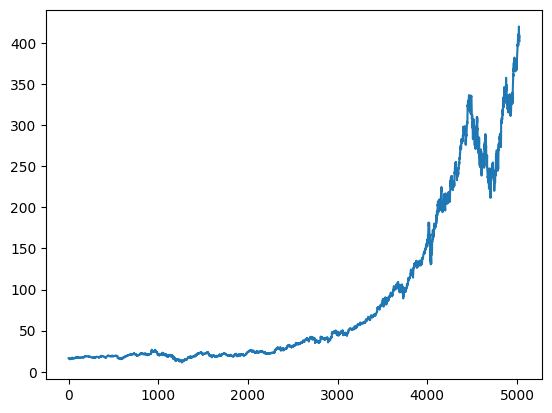

In [12]:
df.adjClose.plot()

In [13]:
# diffs= df.diff()


# Calculate the differences for every column except for the RSI column
df_diff = df.drop(columns=['RSI']).diff().dropna()

# Calculate the RSI using the adjusted close column
rsi_indicator = ta.momentum.RSIIndicator(close=df['adjClose'], window=14)
df['RSI'] = rsi_indicator.rsi()

# Concatenate the differenced data with the RSI column
diffs = pd.concat([df_diff, df['RSI']], axis=1)

# Display the resulting dataframe
print(diffs)

                 date  open      volume  adjClose   adjHigh    adjLow  \
1     3 days, 0:00:00  0.17  -6354200.0  0.106344  0.062555  0.093833   
2      1 day, 0:00:00 -0.02  14418700.0 -0.193921 -0.018767 -0.093833   
3      1 day, 0:00:00 -0.28 -11332300.0 -0.012511 -0.087577 -0.081322   
4      1 day, 0:00:00  0.02 -10975500.0  0.000000 -0.081322 -0.006256   
5      1 day, 0:00:00 -0.14  15826600.0 -0.012511  0.112599 -0.006256   
...               ...   ...         ...       ...       ...       ...   
5026   1 day, 0:00:00  0.07   1424335.0 -2.930000 -0.710000 -0.280000   
5027   1 day, 0:00:00 -0.18    470970.0 -2.500000 -0.840000 -0.850000   
5028  4 days, 0:00:00 -4.72   2011420.0 -1.270000 -3.800000 -5.430000   
5029   1 day, 0:00:00 -3.07  -5676843.0 -0.610000 -2.200000 -0.790000   
0                 NaN   NaN         NaN       NaN       NaN       NaN   

       adjOpen   adjVolume        RSI  
1     0.106344  -6354200.0        NaN  
2    -0.012511  14418700.0        NaN  
3  

In [14]:
# merged_df.dropna(inplace=True)

<Axes: >

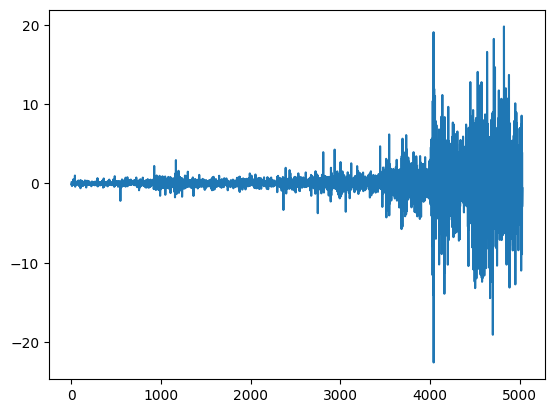

In [15]:
diffs.adjClose.plot()

In [16]:
# Using Pandas sweetviz to generate a report on our dataframe
# report = sv.analyze(diffs)
# report.show_notebook()
# report.show_html('report.html', open_browser=False)

In [17]:
# diffs = merged_df
diffs.corr()

<ipython-input-17-c43c88431770>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,RSI
open,1.000000,-0.007795,0.278659,0.692998,0.706275,0.998953,-0.007795,0.191579
volume,-0.007795,1.000000,-0.023473,0.051873,-0.080876,-0.009030,1.000000,-0.003594
adjClose,0.278659,-0.023473,1.000000,0.687321,0.694356,0.278195,-0.023473,0.204687
adjHigh,0.692998,0.051873,0.687321,1.000000,0.719283,0.693051,0.051873,0.222386
adjLow,0.706275,-0.080876,0.694356,0.719283,1.000000,0.706530,-0.080876,0.218432
adjOpen,0.998953,-0.009030,0.278195,0.693051,0.706530,1.000000,-0.009030,0.184658
adjVolume,-0.007795,1.000000,-0.023473,0.051873,-0.080876,-0.009030,1.000000,-0.003594
RSI,0.191579,-0.003594,0.204687,0.222386,0.218432,0.184658,-0.003594,1.000000


In [18]:
# Assuming your data is sorted by time
# Create a lag feature to represent the previous values
for i in range(1, 6):  # Assuming you want to use the first 15 points to predict the next one
    diffs[f'lag_{i}'] = diffs['adjClose'].shift(i)


In [19]:
diffs.head(10)

,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,RSI,lag_1,lag_2,lag_3,lag_4,lag_5
1,"3 days, 0:00:00",0.17,-6354200.0,0.106344,0.062555,0.093833,0.106344,-6354200.0,NaN,NaN,NaN,NaN,NaN,NaN
2,"1 day, 0:00:00",-0.02,14418700.0,-0.193921,-0.018767,-0.093833,-0.012511,14418700.0,NaN,0.106344,NaN,NaN,NaN,NaN
3,"1 day, 0:00:00",-0.28,-11332300.0,-0.012511,-0.087577,-0.081322,-0.175154,-11332300.0,NaN,-0.193921,0.106344,NaN,NaN,NaN
4,"1 day, 0:00:00",0.02,-10975500.0,0.000000,-0.081322,-0.006256,0.012511,-10975500.0,NaN,-0.012511,-0.193921,0.106344,NaN,NaN
5,"1 day, 0:00:00",-0.14,15826600.0,-0.012511,0.112599,-0.006256,-0.087577,15826600.0,NaN,0.000000,-0.012511,-0.193921,0.106344,NaN
6,"3 days, 0:00:00",0.08,9518000.0,-0.325287,-0.156388,-0.243965,0.050044,9518000.0,NaN,-0.012511,0.000000,-0.012511,-0.193921,0.106344
7,"1 day, 0:00:00",-0.54,11743900.0,-0.068811,-0.237709,-0.168899,-0.337798,11743900.0,NaN,-0.325287,-0.012511,0.000000,-0.012511,-0.193921
8,"1 day, 0:00:00",-0.11,-5955900.0,-0.218943,-0.106344,-0.118855,-0.068811,-5955900.0,NaN,-0.068811,-0.325287,-0.012511,0.000000,-0.012511
9,"1 day, 0:00:00",-0.46,15380500.0,-0.175154,-0.012511,-0.175154,-0.287754,15380500.0,NaN,-0.218943,-0.068811,-0.325287,-0.012511,0.000000
10,"1 day, 0:00:00",0.18,-26399200.0,0.181410,-0.168899,0.100088,0.112599,-26399200.0,NaN,-0.175154,-0.218943,-0.068811,-0.325287,-0.012511


In [20]:
diffs['date'] = df['date']
diffs

,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,RSI,lag_1,lag_2,lag_3,lag_4,lag_5
1,2004-03-01,0.17,-6354200.0,0.106344,0.062555,0.093833,0.106344,-6354200.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2004-03-02,-0.02,14418700.0,-0.193921,-0.018767,-0.093833,-0.012511,14418700.0,NaN,0.106344,NaN,NaN,NaN,NaN
3,2004-03-03,-0.28,-11332300.0,-0.012511,-0.087577,-0.081322,-0.175154,-11332300.0,NaN,-0.193921,0.106344,NaN,NaN,NaN
4,2004-03-04,0.02,-10975500.0,0.000000,-0.081322,-0.006256,0.012511,-10975500.0,NaN,-0.012511,-0.193921,0.106344,NaN,NaN
5,2004-03-05,-0.14,15826600.0,-0.012511,0.112599,-0.006256,-0.087577,15826600.0,NaN,0.000000,-0.012511,-0.193921,0.106344,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,2024-02-15,0.07,1424335.0,-2.930000,-0.710000,-0.280000,0.070000,1424335.0,55.352256,3.912833,-8.923656,-5.280329,6.428226,0.059890
5027,2024-02-16,-0.18,470970.0,-2.500000,-0.840000,-0.850000,-0.180000,470970.0,52.966283,-2.930000,3.912833,-8.923656,-5.280329,6.428226
5028,2024-02-20,-4.72,2011420.0,-1.270000,-3.800000,-5.430000,-4.720000,2011420.0,51.746014,-2.500000,-2.930000,3.912833,-8.923656,-5.280329
5029,2024-02-21,-3.07,-5676843.0,-0.610000,-2.200000,-0.790000,-3.070000,-5676843.0,51.136619,-1.270000,-2.500000,-2.930000,3.912833,-8.923656


In [21]:
diffs = diffs.drop(0)
diffs

,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,RSI,lag_1,lag_2,lag_3,lag_4,lag_5
1,2004-03-01,0.17,-6354200.0,0.106344,0.062555,0.093833,0.106344,-6354200.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2004-03-02,-0.02,14418700.0,-0.193921,-0.018767,-0.093833,-0.012511,14418700.0,NaN,0.106344,NaN,NaN,NaN,NaN
3,2004-03-03,-0.28,-11332300.0,-0.012511,-0.087577,-0.081322,-0.175154,-11332300.0,NaN,-0.193921,0.106344,NaN,NaN,NaN
4,2004-03-04,0.02,-10975500.0,0.000000,-0.081322,-0.006256,0.012511,-10975500.0,NaN,-0.012511,-0.193921,0.106344,NaN,NaN
5,2004-03-05,-0.14,15826600.0,-0.012511,0.112599,-0.006256,-0.087577,15826600.0,NaN,0.000000,-0.012511,-0.193921,0.106344,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5025,2024-02-14,3.13,-7423746.0,3.912833,0.518691,1.917477,3.870311,-7423746.0,58.205736,-8.923656,-5.280329,6.428226,0.059890,8.544351
5026,2024-02-15,0.07,1424335.0,-2.930000,-0.710000,-0.280000,0.070000,1424335.0,55.352256,3.912833,-8.923656,-5.280329,6.428226,0.059890
5027,2024-02-16,-0.18,470970.0,-2.500000,-0.840000,-0.850000,-0.180000,470970.0,52.966283,-2.930000,3.912833,-8.923656,-5.280329,6.428226
5028,2024-02-20,-4.72,2011420.0,-1.270000,-3.800000,-5.430000,-4.720000,2011420.0,51.746014,-2.500000,-2.930000,3.912833,-8.923656,-5.280329


In [22]:
diffs.dropna()

,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,RSI,lag_1,lag_2,lag_3,lag_4,lag_5
13,2004-03-17,-0.02,-9212400.0,-0.031278,0.056300,0.006318,-0.012511,-9212400.0,20.712791,0.012511,-0.137621,0.181410,-0.175154,-0.218943
14,2004-03-18,-0.29,66989600.0,-0.150132,-0.268987,-0.331542,-0.181410,66989600.0,17.749192,-0.031278,0.012511,-0.137621,0.181410,-0.175154
15,2004-03-19,-0.12,-36949400.0,-0.162643,-0.056300,-0.012511,-0.075066,-36949400.0,15.210195,-0.150132,-0.031278,0.012511,-0.137621,0.181410
16,2004-03-22,-0.31,41323600.0,-0.081322,-0.062555,-0.344053,-0.193921,41323600.0,14.122400,-0.162643,-0.150132,-0.031278,0.012511,-0.137621
17,2004-03-23,0.10,-35908900.0,-0.218943,-0.112599,0.062555,0.062555,-35908900.0,11.696942,-0.081322,-0.162643,-0.150132,-0.031278,0.012511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5025,2024-02-14,3.13,-7423746.0,3.912833,0.518691,1.917477,3.870311,-7423746.0,58.205736,-8.923656,-5.280329,6.428226,0.059890,8.544351
5026,2024-02-15,0.07,1424335.0,-2.930000,-0.710000,-0.280000,0.070000,1424335.0,55.352256,3.912833,-8.923656,-5.280329,6.428226,0.059890
5027,2024-02-16,-0.18,470970.0,-2.500000,-0.840000,-0.850000,-0.180000,470970.0,52.966283,-2.930000,3.912833,-8.923656,-5.280329,6.428226
5028,2024-02-20,-4.72,2011420.0,-1.270000,-3.800000,-5.430000,-4.720000,2011420.0,51.746014,-2.500000,-2.930000,3.912833,-8.923656,-5.280329


In [23]:
import numpy as np
np.where(diffs.adjClose >=0 ,1,0 )

array([1, 0, 0, ..., 0, 0, 0])

In [24]:
import numpy as np
diffs['target'] =np.where(diffs.adjClose >=0 ,1,0 )
diffs.head()

,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,RSI,lag_1,lag_2,lag_3,lag_4,lag_5,target
1,2004-03-01,0.17,-6354200.0,0.106344,0.062555,0.093833,0.106344,-6354200.0,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2004-03-02,-0.02,14418700.0,-0.193921,-0.018767,-0.093833,-0.012511,14418700.0,NaN,0.106344,NaN,NaN,NaN,NaN,0
3,2004-03-03,-0.28,-11332300.0,-0.012511,-0.087577,-0.081322,-0.175154,-11332300.0,NaN,-0.193921,0.106344,NaN,NaN,NaN,0
4,2004-03-04,0.02,-10975500.0,0.000000,-0.081322,-0.006256,0.012511,-10975500.0,NaN,-0.012511,-0.193921,0.106344,NaN,NaN,1
5,2004-03-05,-0.14,15826600.0,-0.012511,0.112599,-0.006256,-0.087577,15826600.0,NaN,0.000000,-0.012511,-0.193921,0.106344,NaN,0


In [25]:
diffs.dropna(inplace=True)
diffs


,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,RSI,lag_1,lag_2,lag_3,lag_4,lag_5,target
13,2004-03-17,-0.02,-9212400.0,-0.031278,0.056300,0.006318,-0.012511,-9212400.0,20.712791,0.012511,-0.137621,0.181410,-0.175154,-0.218943,0
14,2004-03-18,-0.29,66989600.0,-0.150132,-0.268987,-0.331542,-0.181410,66989600.0,17.749192,-0.031278,0.012511,-0.137621,0.181410,-0.175154,0
15,2004-03-19,-0.12,-36949400.0,-0.162643,-0.056300,-0.012511,-0.075066,-36949400.0,15.210195,-0.150132,-0.031278,0.012511,-0.137621,0.181410,0
16,2004-03-22,-0.31,41323600.0,-0.081322,-0.062555,-0.344053,-0.193921,41323600.0,14.122400,-0.162643,-0.150132,-0.031278,0.012511,-0.137621,0
17,2004-03-23,0.10,-35908900.0,-0.218943,-0.112599,0.062555,0.062555,-35908900.0,11.696942,-0.081322,-0.162643,-0.150132,-0.031278,0.012511,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5025,2024-02-14,3.13,-7423746.0,3.912833,0.518691,1.917477,3.870311,-7423746.0,58.205736,-8.923656,-5.280329,6.428226,0.059890,8.544351,1
5026,2024-02-15,0.07,1424335.0,-2.930000,-0.710000,-0.280000,0.070000,1424335.0,55.352256,3.912833,-8.923656,-5.280329,6.428226,0.059890,0
5027,2024-02-16,-0.18,470970.0,-2.500000,-0.840000,-0.850000,-0.180000,470970.0,52.966283,-2.930000,3.912833,-8.923656,-5.280329,6.428226,0
5028,2024-02-20,-4.72,2011420.0,-1.270000,-3.800000,-5.430000,-4.720000,2011420.0,51.746014,-2.500000,-2.930000,3.912833,-8.923656,-5.280329,0


In [26]:
diffs.drop(['date','open', 'adjClose', 'adjHigh', 'adjLow', 'adjVolume'],axis=1,inplace=True)
diffs.head()


,volume,adjOpen,RSI,lag_1,lag_2,lag_3,lag_4,lag_5,target
13,-9212400.0,-0.012511,20.712791,0.012511,-0.137621,0.181410,-0.175154,-0.218943,0
14,66989600.0,-0.181410,17.749192,-0.031278,0.012511,-0.137621,0.181410,-0.175154,0
15,-36949400.0,-0.075066,15.210195,-0.150132,-0.031278,0.012511,-0.137621,0.181410,0
16,41323600.0,-0.193921,14.122400,-0.162643,-0.150132,-0.031278,0.012511,-0.137621,0
17,-35908900.0,0.062555,11.696942,-0.081322,-0.162643,-0.150132,-0.031278,0.012511,0


In [27]:
diffs.dropna(inplace=True)

In [28]:
diffs.head()

,volume,adjOpen,RSI,lag_1,lag_2,lag_3,lag_4,lag_5,target
13,-9212400.0,-0.012511,20.712791,0.012511,-0.137621,0.181410,-0.175154,-0.218943,0
14,66989600.0,-0.181410,17.749192,-0.031278,0.012511,-0.137621,0.181410,-0.175154,0
15,-36949400.0,-0.075066,15.210195,-0.150132,-0.031278,0.012511,-0.137621,0.181410,0
16,41323600.0,-0.193921,14.122400,-0.162643,-0.150132,-0.031278,0.012511,-0.137621,0
17,-35908900.0,0.062555,11.696942,-0.081322,-0.162643,-0.150132,-0.031278,0.012511,0


In [29]:
diffs.iloc[:,:-1]

,volume,adjOpen,RSI,lag_1,lag_2,lag_3,lag_4,lag_5
13,-9212400.0,-0.012511,20.712791,0.012511,-0.137621,0.181410,-0.175154,-0.218943
14,66989600.0,-0.181410,17.749192,-0.031278,0.012511,-0.137621,0.181410,-0.175154
15,-36949400.0,-0.075066,15.210195,-0.150132,-0.031278,0.012511,-0.137621,0.181410
16,41323600.0,-0.193921,14.122400,-0.162643,-0.150132,-0.031278,0.012511,-0.137621
17,-35908900.0,0.062555,11.696942,-0.081322,-0.162643,-0.150132,-0.031278,0.012511
...,...,...,...,...,...,...,...,...
5025,-7423746.0,3.870311,58.205736,-8.923656,-5.280329,6.428226,0.059890,8.544351
5026,1424335.0,0.070000,55.352256,3.912833,-8.923656,-5.280329,6.428226,0.059890
5027,470970.0,-0.180000,52.966283,-2.930000,3.912833,-8.923656,-5.280329,6.428226
5028,2011420.0,-4.720000,51.746014,-2.500000,-2.930000,3.912833,-8.923656,-5.280329


In [30]:
# from pycaret.classification import *
# s = setup(diffs ,target='target',session_id=123)

In [31]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf

In [32]:
y = diffs.target.values

X = diffs.iloc[:,:-1].values


In [33]:
# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [34]:
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"y_train shape: {y_train.shape}")

X_train_scaled shape: (3762, 8)
y_train shape: (3762,)


In [36]:


# y_train = y_train.reshape(-1,1)

# Create a Sequential model
nn_model = tf.keras.models.Sequential()

# Add the input layer with the specified input dimension
nn_model.add(tf.keras.layers.Dense(units=3, activation="tanh", input_dim=8))

# Add the hidden layers
nn_model.add(tf.keras.layers.Dense(units=9, activation="tanh"))
nn_model.add(tf.keras.layers.Dense(units=3, activation="tanh"))

# nn_model.add(tf.keras.layers.Dense(units=3, activation="tanh"))
# nn_model.add(tf.keras.layers.Dense(units=9, activation="tanh"))

# Add the output layer with sigmoid activation for binary classification
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model (you can adjust the optimizer, loss, and metrics as needed)
nn_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Summary of the model architecture
nn_model.summary()


# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50, initial_epoch=7)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 27        
                                                                 
 dense_5 (Dense)             (None, 9)                 36        
                                                                 
 dense_6 (Dense)             (None, 3)                 30        
                                                                 
 dense_7 (Dense)             (None, 1)                 4         
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 8/50
118/118 [==============================] - 2s 5ms/step - loss: 0.6933 - accuracy: 0.5181
Epoch 9/50
118/118 [==============================

Use Autotuner

In [ ]:
import sklearn as skl
import matplotlib.pyplot as plt

In [ ]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=7))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 2)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn_model

In [ ]:
!pip install keras_tuner

In [ ]:
# Import the kerastuner library
import keras_tuner as kt
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

In [ ]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=65,validation_data=(X_test_scaled,y_test))

In [ ]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

In [ ]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")